<img src="https://s3-ap-southeast-1.amazonaws.com/he-public-data/wordmark_black65ee464.png" width="700">

# Day 2 - Question 1



**Reading Assignment:**

- [Qiskit Textbook Chapter 1.3 - Representing Qubit States](https://qiskit.org/textbook/ch-states/representing-qubit-states.html)
- [Qiskit Textbook Chapter 1.4 - Single Qubit Gates](https://qiskit.org/textbook/ch-states/single-qubit-gates.html)
- [Qiskit Textbook Chapter 1.5 - The Case for Quantum](https://qiskit.org/textbook/ch-states/case-for-quantum.html)

**Additional Resources:**

- [Qiskit Documentation - Getting Started With Qiskit](https://qiskit.org/documentation/getting_started.html) 
- [Qiskit Youtube - One Minute Qiskit](https://www.youtube.com/playlist?list=PLOFEBzvs-VvpOCmJ9BonUhf7NYB4d1p0e)
- [Qiskit Youtube - Coding With Qiskit (Ep-1, 2, 3, 4)](https://www.youtube.com/playlist?list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY)

**For the Curious:**

- [Circuit Sessions - How to simulate a circuit](https://www.youtube.com/watch?v=VvP41TwY34o)


In [Chapter 1, Section 1.4](https://qiskit.org/textbook/ch-states/single-qubit-gates.html), you have read about the general U3 Gate. Let us recollect its matrix representation which will be helpful in solving the problem below.

$$
U_3(\theta, \phi, \lambda) = \begin{bmatrix} \cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\
            e^{i\phi}\sin(\theta/2) & e^{i\phi+i\lambda}\cos(\theta/2)
     \end{bmatrix}
$$

## Question : Create the state given below using only one u3 gate

$$|\psi\rangle = \frac{1}{2}|0\rangle+i\frac{\sqrt{3}}{2}|1\rangle$$

**Note:** Do not apply [barrier operations](https://youtu.be/tS2CMOyWFMQ)


### Installing required libraries

In [1]:
# run this cell to install/upgrade all the required dependencies
!pip install --upgrade qiskit==0.19.6 
!pip install --upgrade numpy==1.18.5
!pip install --upgrade matplotlib==3.2.0

# the output will be cleared after installation
from IPython.display import clear_output
clear_output()

import qiskit
print("Qiskit version: {}".format(qiskit.__qiskit_version__))

Qiskit version: {'qiskit-terra': '0.14.2', 'qiskit-aer': '0.5.2', 'qiskit-ignis': '0.3.3', 'qiskit-ibmq-provider': '0.7.2', 'qiskit-aqua': '0.7.3', 'qiskit': '0.19.6'}


### Importing required libraries

Once we have confirmed that the Qiskit version you are using is 0.19.6 (recommended) lets go ahead and import some visualization tools from Qiskit which will be useful later. Rest of the Qiskit imports will be done when required. 

In [2]:
%matplotlib inline

# defining a magic function for creating the submission file.
from IPython.core.magic import register_cell_magic
@register_cell_magic
def write_and_run(line, cell):
    argz = line.split()
    file = argz[-1]
    mode = 'w'
    with open(file, mode) as f:
        f.write(cell)
    get_ipython().run_cell(cell)
    
# Importing Qiskit visualization libraries 
from qiskit.tools.jupyter import *
from qiskit.visualization import *

Now that we have imported what we require lets build our circuit in the `build_state()` function where we have already initialized a `QuantumCircuit` for one qubit. Your task is to add necessary gates as specified in the question and return the quantum circuit. In the case that you require classes that haven't already been imported include them in the space given below for importing libraries.

**Note:** Do not change the name of the function `build_state()`. 

In [3]:
%%write_and_run answer_day2_question1.py

### WRITE YOUR CODE BETWEEN THESE LINES - START
    
# import libraries that are used in the function below.
from qiskit import QuantumCircuit
import numpy as np

### WRITE YOUR CODE BETWEEN THESE LINES - END

def build_state():

    # intialized a quantum circuit on one qubit
    circuit = QuantumCircuit(1)
    
    ### WRITE YOUR CODE BETWEEN THESE LINES - START
    
    # apply the necessary u3 gate
    circuit.u3(0.75*np.pi,np.pi/2,0,0)
    
    ### WRITE YOUR CODE BETWEEN THESE LINES - END
    return circuit

**Circuit Diagram**

In [4]:
my_circuit1 = build_state()
my_circuit1.draw()

┌──────────────────┐
q_0: ┤ U3(3pi/4,pi/2,0) ├
     └──────────────────┘

**Bloch Sphere**

Lets run the circuit we've built using a `statevector_simulator` and look at its state on a bloch sphere. Bloch sphere is ideal when you have to look at the state of a single qubit. You can check out the documentation [here](https://qiskit.org/documentation/tutorials/circuits/2_plotting_data_in_qiskit.html) for more plotting options. 

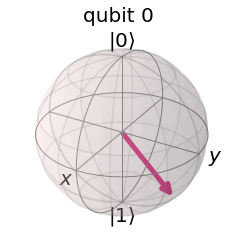

In [5]:
# importing the simulator
from qiskit import execute, Aer

backend = Aer.get_backend("statevector_simulator")
job = execute(my_circuit1,backend=backend)
statevector1 = job.result().get_statevector()
plot_bloch_multivector(statevector1)